In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

data = load_breast_cancer()

In [ ]:
dataframe = []
type(data)
df_cancer = pd.DataFrame(data=data.data, columns=data.feature_names)
df_cancer.head()

train_split = 0.7
lenght = int(len(df_cancer) * train_split)

train = df_cancer.iloc[:lenght]
test = df_cancer.iloc[lenght:]
print(train)
print(test)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
393        21.61         22.28          144.40     1407.0          0.11670   
394        12.10         17.72           78.07      446.2          0.10290   
395        14.06         17.18           89.75      609.1          0.08045   
396        13.51         18.89           88.10      558.1          0.10590   
397        12.80         17.46           83.05      508.3          0.08044   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
dataframe = []
type(df_cancer)

sklearn.utils._bunch.Bunch

# Машинное обучение, метрики, сплит

Машинное обучение - область знаний, которая изучает способность компьютера обучиться какой-либо задаче, не будучи явно запрограммированной. Машина должна на основе предыдущего опыта и полученных знаний решить схожую задачу. Например, просмотреть данные за последние 10 лет по выброрсам в атмосферу парниковых газов и спрогнозировать увеличение или уменьшение выбросов через 5 лет. По характеристикам организма предсказать предрасположенность к заболеванию

Две основные характеристики, которые задаёт исследователь - данные и метод. С данными мы с вами научились работать. Убирали дубликаты, заполняли пропуски средним значением/медианой/модой. Научились искать визуально корреляции. Сегодня коснёмся именно подбора методов

Помимо этих двух характеристик исследователь должен определить метрику, она также будет разная в зависимости от задачи

Обучать будем нашу модель с учителем: каждый семпл будет иметь ответ. При таком подходе каждый датасет имеет фичи - параметры, которые имеет объект. И таргетная переменная - то, что мы хотим предсказать. Фичи обязательно должны быть подобраны таким образом, чтобы имели связь с таргетной переменной или хотя бы гипотетически могли на неё влиять

Напомним себе основные задачи машинного обучения: классификация - предсказания категории/класса (болеет или не болеет), регрессия - предсказания вещественного числа (количество гормона в организме), кластеризация - предсказания группы/кластера (сбор объектов по схожим характеристикам - разбить гены по их активности в какой-то момент времени)

Метрики служат для определения качества модели. Как оценить качество модели по метрики? Необходимо с чем-то сравнивать модель. Для этого сущесвтует стандартный метод Train-test split. Он заключается в разбиении вашего датасета на тренировочный (модель учится на нём) и тестовый (замерять качество). Цель данного метода проверить модель на данных, которые она ранее не видела, на которых не обучалась. Стандартное разделение - 70/30 или 80/20. При этом данные должны отбираться случайным образом

## Разделите датасет на тренировочный и тестовый набор (70/30). Перемешивать не нужно

In [ ]:
data_f = [1,0,1,2,4,6,4,2,4,6,7,8,4,3,4,6,6,3,4,8,0]
data_t = [0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0]

In [ ]:
# code

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_f, data_t, test_size=0.3, random_state=42)
train_x, test_x, train_y, test_y

([2, 4, 6, 3, 1, 6, 0, 4, 4, 2, 7, 4, 8, 4],
 [1, 3, 6, 0, 4, 6, 8],
 [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
 [0, 0, 1, 0, 1, 1, 1])

Самый простой способ проверить модель - accuracy. Качество модели замеряется так: количество правильных прогнозов / количество всех прогнозов * 100

## Рассчитайте accuracy для следующего примера:

In [ ]:
true_l = [1,1,0,1,1,0]
pred_l = [1,1,0,1,0,1]
count = 0
for i, el in enumerate(true_l):
  if el == pred_l[i]:
    count += 1

acc = count / len(pred_l)
print(acc)

0.6666666666666666


In [ ]:
# code

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(true_l, pred_l)

0.6666666666666666

Матрица ошибок - это таблица, которая позволяет визуализировать эффективность алгоритма классификации путем сравнения прогнозируемого значения целевой переменной с ее фактическим значением. Столбцы матрицы представляют наблюдения в прогнозируемом классе, а строки - наблюдения в фактическом классе

![image-4.png](attachment:image-4.png)
![image-5.png](attachment:image-5.png)
![image-6.png](attachment:image-6.png)
![image-7.png](attachment:image-7.png)

## Рассчитайте confusion matrix для следующего примера:

In [ ]:
true_l = [1,1,0,1,1,0]
pred_l = [1,1,0,1,0,1]

In [ ]:
# code
count_TP = 0
count_TN = 0
count_FN = 0
count_FT = 0

for i, el in enumerate(pred_l):
  if true_l[i] == el == 1:
    count_TP += 1
  elif true_l[i] > el:
    count_FT += 1
  elif true_l[i] < el:
    count_FN += 1
else:
    count_TN += 1

matrix = [[count_TP, count_FN],
          [count_FT, count_TN]]

for row in matrix:
  print(row)

[3, 1]
[1, 1]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(true_l, pred_l)

array([[1, 1],
       [1, 3]])

Теперь давайте взглянем на пример

In [ ]:
t = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
p = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1]

accuracy_score(t,p)

0.8333333333333334

Recall рассчитывается как отношение числа Positive выборок, корректно классифицированных как Positive, к общему количеству Positive семплов. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще.

![image.png](attachment:image.png)

In [ ]:
confusion_matrix(t,p)

array([[19,  3],
       [ 1,  1]])

In [ ]:
1 / 2

0.5

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(t, p)

0.5

Это означает, что когда нам попадается объект класса 1, мы его предсказываем со точностью подбрасывания монеты

Precision - отношение числа семплов, верно классифицированных как Positive, к общему числу выборок с меткой Positive (распознанных правильно и неправильно). Цель precision – классифицировать все Positive семплы как Positive, не допуская ложных определений Negative как Positive. Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive.

![image.png](attachment:image.png)

In [ ]:
1/4

0.25

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(t,p)

0.25

Точность предсказания класса 1 (всего 4 раза предсказала модель) равна 0.25. Лучше монету кидать

# Дерево решений

Для начала попробуем самый простой метод обучений - деревья решений. Дерево решений представляет собой иерархическую древовидную структуру, состоящую из правила вида «Если …, то ...». За счет обучающего множества правила генерируются автоматически в процессе обучения

In [ ]:
data_f = [1,0,1,2,4,6,4,2,4,6,7,8,4,3,4,6,6,3,4,8,0]
data_t = [0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0]

In [ ]:
target = []
for el in data_f:
    if el >= 4:
        target.append(1)
    else:
        target.append(0)
target

[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0]

## Даны входные и выходные данные, составьте дерево решений, чтобы получить ответ как в data_f

In [ ]:
data_f = [[2,6], [4,1], [3,1], [1,1]]
data_t = [1,1,0,0]

In [ ]:
data_f = [[2,6], [4,1], [3,1], [1,1]]
data_t = [1,1,0,0]

targets = []
for data in data_f:

  if max(data) >= 4:
    targets.append(1)

  else:
    targets.append(0)

targets


[1, 1, 0, 0]

Импортируем и рассмотрим датасет с предыдущего занятия

In [ ]:
cancer = load_breast_cancer()

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Разделим нашу выборку на тест и трейн

In [ ]:
x = df.drop(['target'], axis=1)
#print(x)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((398, 30), (171, 30))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier() #задаём переменной класс дерева решений
model.fit(x_train, y_train) #метод fit - обучает модель на трейне

DecisionTreeClassifier()

In [ ]:
predicted_train = model.predict(x_train) #метод predict показывает ответы модели для каждого семпла
predicted_test = model.predict(x_test)
predicted_train, predicted_test

(array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
        1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
        0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
        1., 

In [ ]:
accuracy_score(y_train, predicted_train), accuracy_score(y_test, predicted_test)

(1.0, 0.935672514619883)

In [ ]:
confusion_matrix(y_test, predicted_test)

array([[ 60,   3],
       [  8, 100]])

In [ ]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.73648849, 0.        , 0.        ,
       0.01356259, 0.00715165, 0.        , 0.        , 0.00200417,
       0.        , 0.        , 0.01716396, 0.        , 0.        ,
       0.0481188 , 0.12836564, 0.        , 0.0366527 , 0.01049202,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
list(zip(x_train.columns, model.feature_importances_))

[('mean radius', 0.0),
 ('mean texture', 0.0),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.7364884884620588),
 ('mean symmetry', 0.0),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.013562586797775495),
 ('texture error', 0.007151649102000844),
 ('perimeter error', 0.0),
 ('area error', 0.0),
 ('smoothness error', 0.0020041685450463767),
 ('compactness error', 0.0),
 ('concavity error', 0.0),
 ('concave points error', 0.017163957844802027),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.04811879537986433),
 ('worst texture', 0.1283656353976493),
 ('worst perimeter', 0.0),
 ('worst area', 0.036652696366148256),
 ('worst smoothness', 0.01049202210465462),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0),
 ('worst concave points', 0.0),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

In [ ]:
precision_score(y_test, predicted_test), recall_score(y_test, predicted_test)

(0.9705882352941176, 0.9166666666666666)

# Random forest

Random forest - модель, состоящая из множества деревьев решений. Вместо того,чтобы просто усреднять прогнозы разных деревьев (такая концепция называется просто «лес»), эта модель использует две ключевые концепции, которые и делают этот лес случайным.

1. Случайная выборка образцов из набора данных при построении деревьев.
2. При разделении узлов выбираются случайные наборы параметров.

Сделаем несколько обучений нашей модели, но при разделении укажем параметр shufle. Будем перемешивать каждый раз данные

In [ ]:
acc_list, acc_list2 = [], []
model = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()

for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

    model.fit(x_train, y_train)
    model2.fit(x_train, y_train)

    predicted_test = model.predict(x_test)
    predicted_test2 = model2.predict(x_test)

    acc_list.append(accuracy_score(y_test, predicted_test))
    acc_list2.append(accuracy_score(y_test, predicted_test2))

In [ ]:
np.mean(acc_list), np.std(acc_list)

(0.9298245614035088, 0.007669518741873683)

In [ ]:
np.mean(acc_list2), np.std(acc_list2)

(0.9313450292397658, 0.007471661405232489)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((398, 30), (171, 30))

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
predicted_train = model.predict(x_train)
predicted_test = model.predict(x_test)
predicted_train, predicted_test

(array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
        1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
        0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
        1., 

In [ ]:
accuracy_score(y_train, predicted_train), accuracy_score(y_test, predicted_test)

(1.0, 0.9766081871345029)

In [ ]:
confusion_matrix(y_test, predicted_test), precision_score(y_test, predicted_test), recall_score(y_test, predicted_test)

(array([[ 60,   3],
        [  1, 107]]),
 0.9727272727272728,
 0.9907407407407407)

# k-NN

Метод ближайших соседей (k-nearest neighbors algorithm, k-NN) - Метод k-ближайших соседей используется для решения задачи классификации. Он относит объекты к классу, которому принадлежит большинство из k его ближайших соседей в многомерном пространстве признаков. Число k - это количество соседних объектов в пространстве признаков, которые сравниваются с классифицируемым объектом. Иными словами, если k=10, то каждый объект сравнивается с 10-ю соседями

![image.png](attachment:image.png)

## Есть два объекта, описанных десятью признаками. Нужно определить, к какому объекту - А или В - ближе объект X. Для этого:

1. рассчитайте евклидово расстояние между объектами A/B и Х.
2. определите, какой объект ближе и сделайте выводы.

![image.png](attachment:image.png)

In [ ]:
A = [2, 1, 2, 1, 2, 1, 2, 1, 10, 10]
B = [3, 2, 5, 2, 2, 5, 4, 5, 6, 1]
X = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [ ]:
# code

Посмотрим на распределение классов в тесте, есть пересечения, но группы разделимы

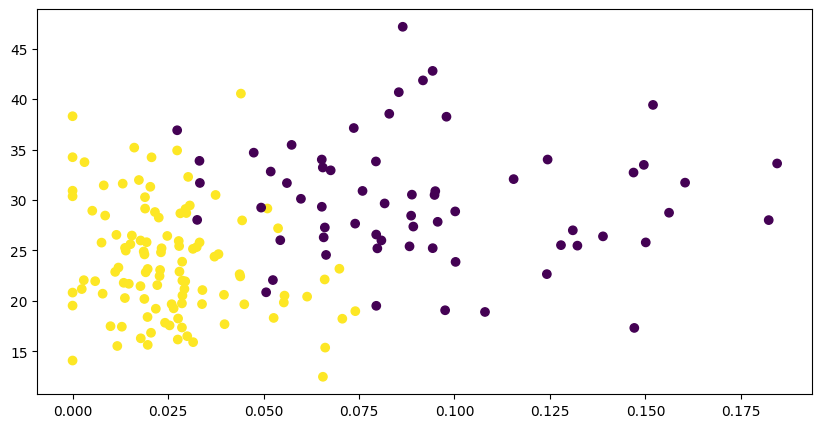

In [ ]:
f, ax1 = plt.subplots(1, figsize=(10,5))
ax1.scatter(x_test["mean concave points"], x_test["worst texture"], c=y_test);

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
predicted_train = model.predict(x_train)
predicted_test = model.predict(x_test)

In [ ]:
accuracy_score(y_test, predicted_test)

0.9590643274853801

In [ ]:
confusion_matrix(y_test, predicted_test), precision_score(y_test, predicted_test), recall_score(y_test, predicted_test)

(array([[ 57,   6],
        [  1, 107]]),
 0.9469026548672567,
 0.9907407407407407)

## Найдите оптимальное количество соседей (до 15)

In [ ]:
# code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

neighbors = np.arange(1, 16)
accuracy_scores = []

for k in neighbors:
    # Создать модель KNN с параметром n_neighbors = k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Обучить модель на обучающей выборке
    knn.fit(x_train, y_train)

    # Получить предсказания модели для тестовой выборки
    y_pred = knn.predict(x_test)

    # Вычислить и добавить в список точность модели
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Построить график точности модели от количества соседей
plt.plot(neighbors, accuracy_scores, '-o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.xticks(neighbors)
plt.show()

# Найти индекс максимального значения точности
max_index = np.argmax(accuracy_scores)

# Получить оптимальное количество соседей
optimal_neighbors = neighbors[max_index]

# Вывести оптимальное количество соседей и соответствующую точность модели
print("Optimal number of neighbors:", optimal_neighbors)
print("Accuracy with optimal number of neighbors:", accuracy_scores[max_index])

NameError: ignored

# Логистическая регрессия

Логистическая регрессия схожа с линейной, за исключением того факта, что вместо вычисления значения у, она оценивает к какой категории принадлежит точка данных. Логистическая регрессия хорошо подходит для решения задач двоичной классификации - назначая разным категориям значения 0 и 1 соответственно

По опыту построения предыдущих моделей, постройте модель логистической регрессии. Посчитайте confusion matrix, accuracy, precision и recall. Тюнингуя параметр C (от 0.05 до 5 с шагом 0.1), найдите наилучшую точность на тесте

C (C Regularization Parameter) - это параметр штрафования или неверной классификации. За каждую ошибку модель штрафуется, что может увеличить эффективность, но и увеличить переобучение

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# code
from sklearn.linear_model import LogisticRegression
C_values = np.arange(0.05, 5, 0.1)
accuracy_scores =[]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

for C in C_values:
    # Создание модели и обучение на тренировочных данных
    model = LogisticRegression(C=C)
    model.fit(x_train, y_train)

# Предсказание на тестовых данных
    x_pred_test = model.predict(x_test)
    #print(x_pred_test)

# Расчет метрик оценки модели
    accuracy = accuracy_score(y_test, x_pred_test)
    precision = precision_score(y_test, x_pred_test)
    recall = recall_score(y_test, x_pred_test)
    confusion = confusion_matrix(y_test, x_pred_test)

# Обновление списка с точностью модели на данной итерации
    accuracy_scores.append(accuracy)

# Создание списка из пар значений С и значений точности
best_list = list(zip(C_values, accuracy_scores))

#Получение наибольшего значения из списка и его индекса
max_value = max(best_list)
max_index = best_list.index(max_value)
print('Значение С с наибольшей точностью модели:', best_list[max_index][0], 'Наибольшая точность модели:', best_list[max_index][1] )

Значение С с наибольшей точностью модели: 4.950000000000001 Наибольшая точность модели: 0.9649122807017544


## Нейронная сеть

Искусственная нейронная сеть — это математическая модель, созданная по подобию биологических нейронных сетей. На входной слой нейронов поступает некая информация, которая по синапсам переходит на следующий слой. При этом каждый синапс обладает собственным коэффициентным весом, а любой следующий нейрон в новом слое может иметь несколько входов. Информация передается дальше до тех пор, пока не дойдет до конечного выхода

Модель узнает, какие связи между нейронами важны для успешного прогнозирования во время обучения. На каждом этапе тренировки сеть использует математическую функцию, чтобы определить, насколько точным был ее последний прогноз по сравнению с ожидаемым.

Эта функция генерирует серию значений ошибок, которые могут использоваться системой для расчета того, как модель должна обновлять значение весов, прикрепленных к каждой ссылке, с конечной целью повышения точности прогнозов сети.

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
# code

In [ ]:
ml = MLPClassifier()
ml.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
ml.fit(x_train, y_train)
predicted_test_ml = ml.predict(x_test)

In [ ]:
confusion_matrix(y_test, predicted_test_ml)

array([[ 61,   2],
       [  3, 105]], dtype=int64)

In [ ]:
accuracy_score(y_test, predicted_test_ml), precision_score(y_test, predicted_test_ml), recall_score(y_test, predicted_test_ml)

(0.9707602339181286, 0.9813084112149533, 0.9722222222222222)

## Используя предыдущие модели (можно тюнинговать) найдите наилучшую, которая покажет максимальный accuracy_score на тестовом наборе данных (25 минут). Победитель получит +4 балла, которые будут разделены по его усмотрению на 2 уср

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/CNN/python practice'
print("Исходный путь к рабочей директории: ", os.getcwd())
os.chdir(path)
print("Новый путь к рабочей директории: ", os.getcwd())

# code
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

#Загрузка датасета из подготовленных в библиотеке pandas
df = pd.read_csv('cancer_cleaned_prepared.csv')

x = df.drop(['target'], axis=1)
#print(x)
y = df['target']

#Best parameters found:
#{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}



#Разделение датасета на тренировочный и тестовый
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

#Определение экземпляра класса инструмента по нормализации данных
scaler = StandardScaler()

#Преобразование тренировочного и тестового датасета(нормализация)
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

#Определение гиперпараметров модели
ml = MLPClassifier(alpha=1e-4, max_iter=400, solver='adam', activation='tanh', hidden_layer_sizes=(100,), learning_rate='constant')


parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#Создание экземпляра класса инструмента по поиску наиболее оптимальных гиперпараметров
clf = GridSearchCV(ml, parameter_space, n_jobs=-1, cv=3)

#Обучение модели с использованием инструмента поиска оптимальных гиперпараметров
clf.fit(scaled_x_train, y_train)

#Вывод результата работы инструмента по поиску оптимальных гиперпараметров
print('Best parameters found:\n', clf.best_params_)

#Вывод всей информации
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

#Обучение модели с использованием полученной информации об оптимальных гиперпараметрах
#Наиболее оптимальные параметры согласно инструменту GridSearchCV
#alpha=1e-4, max_iter=400, solver='adam', activation='relu', hidden_layer_sizes=(100,), learning_rate='constant'
ml.fit(scaled_x_train, y_train)
predicted_test_ml = ml.predict(scaled_x_test)

#Вывод информации о модели(матрица ошибок + точность)
print(confusion_matrix(y_test, predicted_test_ml))
print('Accurace_score: ', accuracy_score(y_test, predicted_test_ml))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Исходный путь к рабочей директории:  /content/drive/My Drive/CNN/python practice
Новый путь к рабочей директории:  /content/drive/MyDrive/CNN/python practice
Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.894 (+/-0.078) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.897 (+/-0.038) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.894 (+/-0.057) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.894 (+/-0.054) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': '

In [ ]:
# code
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

#Загрузка датасета из подготовленных в библиотеке pandas
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

x = df.drop(['target'], axis=1)
#print(x)
y = df['target']





#Разделение датасета на тренировочный и тестовый
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

#Определение экземпляра класса инструмента по нормализации данных
scaler = StandardScaler()

#Преобразование тренировочного и тестового датасета(нормализация)
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

#Определение гиперпараметров модели
ml = MLPClassifier(alpha=1e-4, max_iter=400, solver='adam', activation='relu', hidden_layer_sizes=(100,), learning_rate='constant')

'''
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#Создание экземпляра класса инструмента по поиску наиболее оптимальных гиперпараметров
clf = GridSearchCV(ml, parameter_space, n_jobs=-1, cv=3)

#Обучение модели с использованием инструмента поиска оптимальных гиперпараметров
clf.fit(scaled_x_train, y_train)

#Вывод результата работы инструмента по поиску оптимальных гиперпараметров
print('Best parameters found:\n', clf.best_params_)

#Вывод всей информации
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))'''

#Обучение модели с использованием полученной информации об оптимальных гиперпараметрах
#Наиболее оптимальные параметры согласно инструменту GridSearchCV
#alpha=1e-4, max_iter=400, solver='adam', activation='relu', hidden_layer_sizes=(100,), learning_rate='constant'
ml.fit(scaled_x_train, y_train)
predicted_test_ml = ml.predict(scaled_x_test)

#Вывод информации о модели(матрица ошибок + точность)
print(confusion_matrix(y_test, predicted_test_ml))
print('Accurace_score: ', accuracy_score(y_test, predicted_test_ml))

[[ 61   2]
 [  1 107]]
Accurace_score:  0.9824561403508771


# Кросс-валидация

Кросс-валидация в основном используется в прикладном машинном обучении для оценки квалификации модели машинного обучения на не используемых данных. То есть использовать ограниченную выборку (test sample) для оценки того, как модель будет работать в целом при использовании ее при прогнозирования на данных, не используемых во время обучения модели.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(ml, x, y, cv=3)
scores, np.mean(scores)

(array([0.93157895, 0.95263158, 0.92592593]), 0.9367121507472386)

# One-Hot Encoding

In [ ]:
df2 = pd.DataFrame({0:['cat','dog','cat'], 1:[1,2,3], 2:[1000,2000,3000]})
df2

,0,1,2
0,cat,1,1000
1,dog,2,2000
2,cat,3,3000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [ ]:
ohe.fit(df2[[0]])

OneHotEncoder(sparse=False)

In [ ]:
ohe_cat0 = ohe.transform(df2[[0]])
ohe_cat0

array([[1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
ohe.inverse_transform(ohe_cat0)

array([['cat'],
       ['dog'],
       ['cat']], dtype=object)

In [ ]:
ohe.get_feature_names()

array(['x0_cat', 'x0_dog'], dtype=object)

In [ ]:
df2[ohe.get_feature_names()] = ohe_cat0
df2

,0,1,2,x0_cat,x0_dog
0,cat,1,1000,1.0,0.0
1,dog,2,2000,0.0,1.0
2,cat,3,3000,1.0,0.0


In [ ]:
df2 = df2.drop([0], axis=1)
df2

,1,2,x0_cat,x0_dog
0,1,1000,1.0,0.0
1,2,2000,0.0,1.0
2,3,3000,1.0,0.0


# Нормализация данных

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
col = df2.columns.tolist()

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(df2[col])

StandardScaler()

In [ ]:
std_scaled = std_scaler.transform(df2[col])
std_scaled

array([[-1.22474487, -1.22474487,  0.70710678, -0.70710678],
       [ 0.        ,  0.        , -1.41421356,  1.41421356],
       [ 1.22474487,  1.22474487,  0.70710678, -0.70710678]])

In [ ]:
df2 = pd.DataFrame(std_scaled, columns=col)
df2

,1,2,x0_cat,x0_dog
0,-1.224745,-1.224745,0.707107,-0.707107
1,0.000000,0.000000,-1.414214,1.414214
2,1.224745,1.224745,0.707107,-0.707107
